# Analiza mocy testu

1. Stwórz krzywą mocy testu dla testu jednej średniej.
2. Określ kluczowe parametry wejściowe, takie jak odchylenie standardowe populacji (σ), poziom istotności (α) oraz wielkość efektu (Δ).

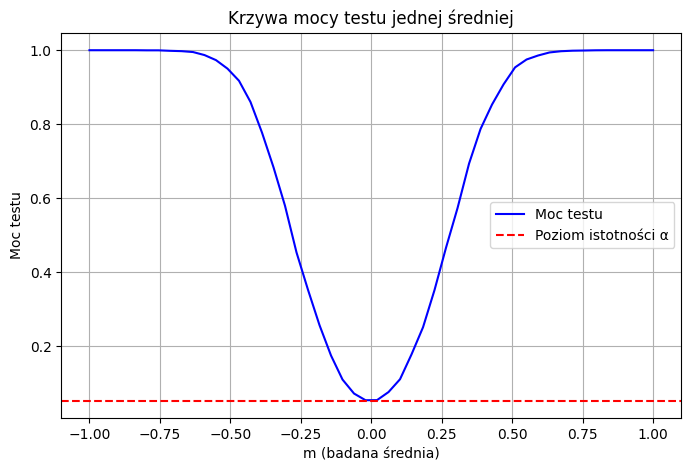

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha = 0.05  # Poziom istotności
sigma = 1  # Odchylenie standardowe
n = 50  # Wielkość próby
mu_0 = 0  # Średnia w H0
k = 10000  # Liczba symulacji

# Wartości m dla testu
m_values = np.linspace(-1, 1, 50)

# Krytyczna wartość Z dla testu dwustronnego
z_critical = norm.ppf(1 - alpha / 2)
critical_value = z_critical * (sigma / np.sqrt(n))

# Obliczanie mocy testu
power = []
for mu in m_values:
    # Generujemy próbki (k próbek o n obserwacjach)
    samples = np.random.normal(mu, sigma, (k, n))
    sample_means = np.mean(samples, axis=1)
    
    # Obliczamy statystykę testową Z
    z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))
    
    # Sprawdzamy odrzucenie H0 (dwustronne)
    rejections = (np.abs(z_scores) > z_critical)
    power.append(np.mean(rejections))

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(m_values, power, label="Moc testu", color="b")
plt.axhline(y=alpha, color="r", linestyle="--", label="Poziom istotności α")
plt.xlabel("m (badana średnia)")
plt.ylabel("Moc testu")
plt.title("Krzywa mocy testu jednej średniej")
plt.legend()
plt.grid()
plt.show()
